## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import  LogisticRegression
from sklearn.svm import  SVC
from sklearn.tree  import  DecisionTreeClassifier
from sklearn.ensemble import  BaggingClassifier
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.ensemble import  RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay,classification_report

import warnings
warnings.filterwarnings('ignore')

folder_path = 'G:/' # for saving plots in folder

Loading Data

In [2]:
data = pd.read_csv('diabetes.csv')

Making Copy of the Data

In [3]:
df = data.copy()

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Checking for Data Shape

In [5]:
df.shape

(768, 9)

Checking For Statistical Summary of the DataFrame

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Checking for Missing Values

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Checking Brief Info of DataFrame

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Checking for Duplicated Rows

In [9]:
Dup_Rows = df[df.duplicated()]
Dup_Rows.shape

(0, 9)

Checking for OutLiers in DataFrame

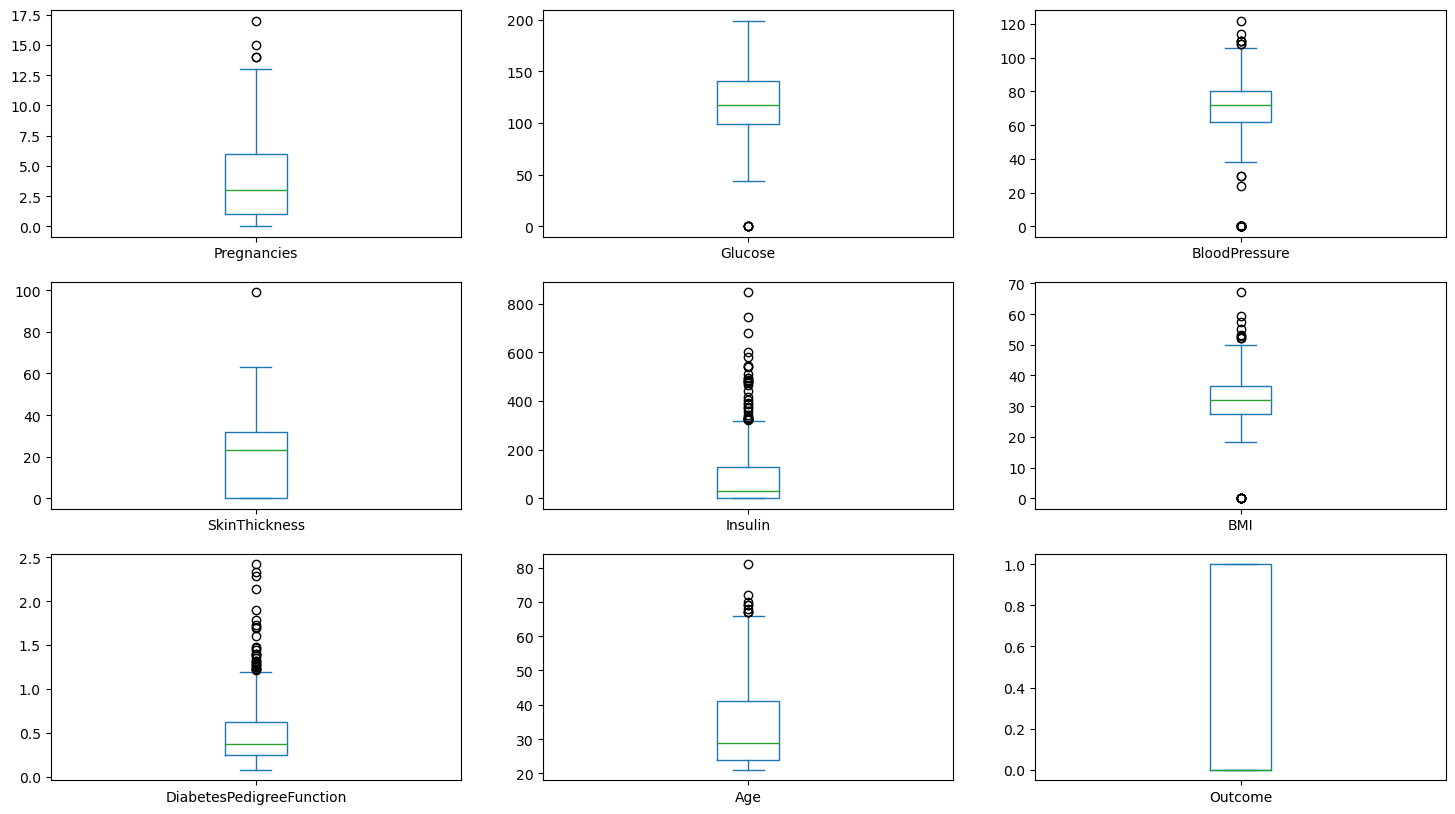

In [10]:
df.plot(kind = 'box',sharex = False, sharey = False, subplots = True, layout = (3,3), figsize = (18,10) );

Checking for Data Imbalancy In Target Variable

In [11]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [12]:
df.Outcome.value_counts(normalize = True)*100

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

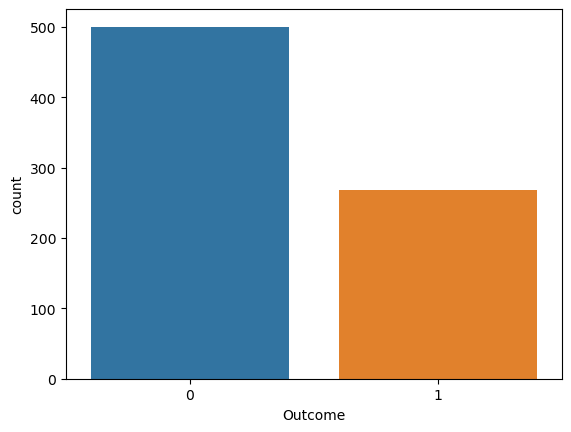

In [13]:
sns.countplot(x = 'Outcome', data = df);
plt.savefig(folder_path + 'Outcome_Imbalanced.png')

**UNIVARIATE ANALYSIS**

Defining Function to generate plots for analysing the distributions and outliers

In [14]:
def uniplot(df, col_name):
    Skewness_Coefficient = df[col_name].skew()
    print(f'{col_name} has Skewness Coefficient of: {Skewness_Coefficient}')
    # Creating a figure with two subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

    # Subplot 1: Distribution Plot
    sns.histplot(df[col_name], kde=True, ax=axes[0])
    axes[0].set_title('Distribution')

    # Subplot 2: Boxplot
    sns.boxplot(x=df[col_name], ax=axes[1])
    axes[1].set_title('Outliers')


    plt.tight_layout()
    folder_path = 'G:/'
    plt.savefig(folder_path + col_name + '.png')
    plt.show()

**1. Pregnancies**

In [15]:
df.Pregnancies

0       6
1       1
2       8
3       1
4       0
       ..
763    10
764     2
765     5
766     1
767     1
Name: Pregnancies, Length: 768, dtype: int64

Pregnancies has Skewness Coefficient of: 0.9016739791518588


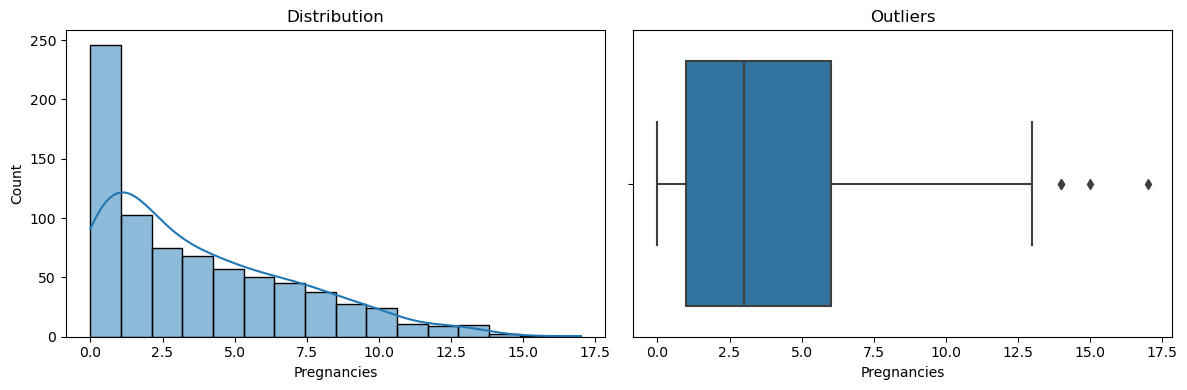

In [16]:
uniplot(df,'Pregnancies')

Performing Feature Engineering  - Seperating Number of Pregnancies Frequencies in to Low | High | VeryHigh

In [17]:
bins = [0, 2, 5, 20]
labels = ['Low','High', 'VeryHigh']

df['Pregnancies_bin'] = pd.cut(df['Pregnancies'], bins, labels=labels, include_lowest= True)

In [18]:
df[['Pregnancies','Pregnancies_bin']]

,Pregnancies,Pregnancies_bin
0,6,VeryHigh
1,1,Low
2,8,VeryHigh
3,1,Low
4,0,Low
...,...,...
763,10,VeryHigh
764,2,Low
765,5,High
766,1,Low


In [19]:
df.Pregnancies_bin.value_counts(normalize = True)*100

Low         45.442708
VeryHigh    28.515625
High        26.041667
Name: Pregnancies_bin, dtype: float64

### Summary
	- Data is varing from 0 time of being pregnent  to 17 times being pregnent
	- Perform Feature Engineering , seperated the data on the bassis of number of pregnancies
	- Data is categorized in Low | High | Very-High band
	- Low          45%
	- VeryHigh     29%
	- High         26%



**(2) Glucose : Plasma glucose concentration a 2 hours in an oral glucose tolerance test**



In [20]:
df.Glucose

0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64

Glucose has Skewness Coefficient of: 0.17375350179188992


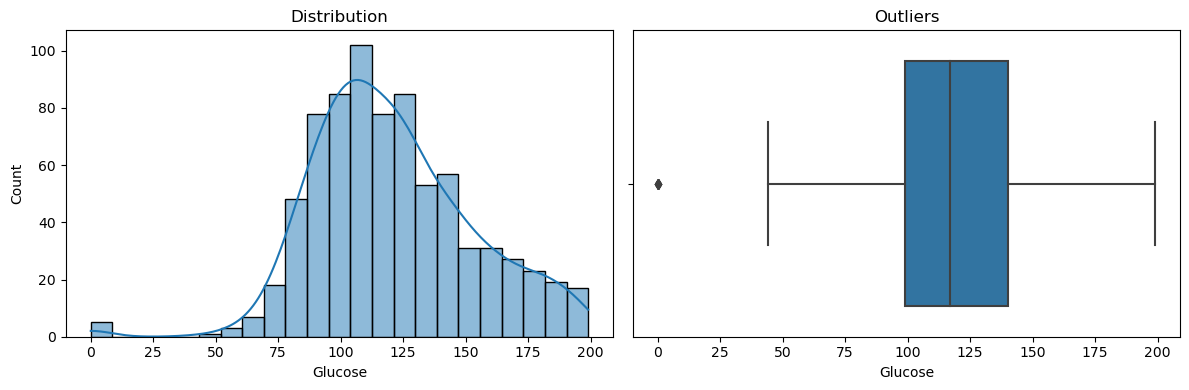

In [21]:
uniplot(df, 'Glucose');

### Summary
	-  Data has Skewness Coefficient of: 0.18 (It is not Skewed)
	- Skewness is because of Outliers(Data does not required any tranformation)
	- Most of the Population has glucose concentration between 90 - 120




**(3) BloodPressure : Diastolic blood pressure (mm Hg)**

BloodPressure has Skewness Coefficient of: -1.8436079833551302


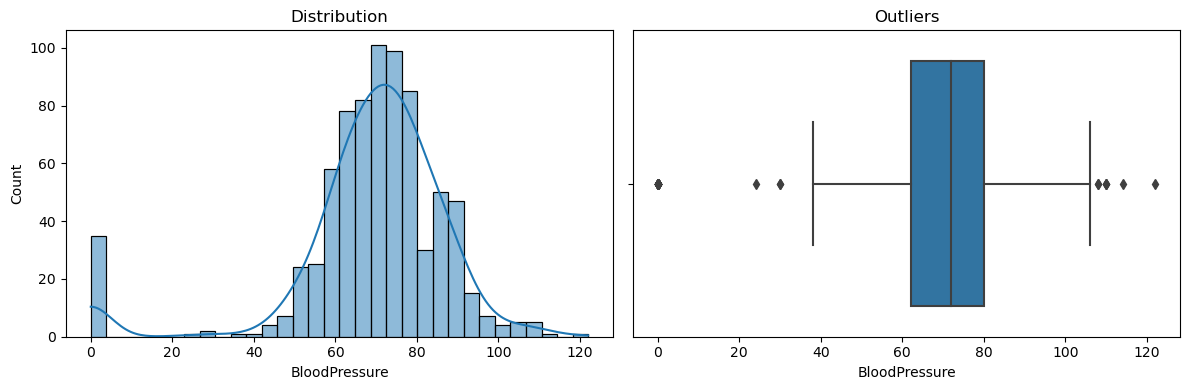

In [22]:
uniplot(df,'BloodPressure')

### Summary
		- BloodPressure has Skewness Coefficient of: -1.8 (Data seems Skewd to the left)
		- Skewness is because of Outliers (Data does not require any tranformation)
		- Most of the Population has BloodPressure between 60 mm-hg - 80 mm-hg




**(4) SkinThickness : Triceps skin fold thickness (mm)**

SkinThickness has Skewness Coefficient of: 0.10937249648187608


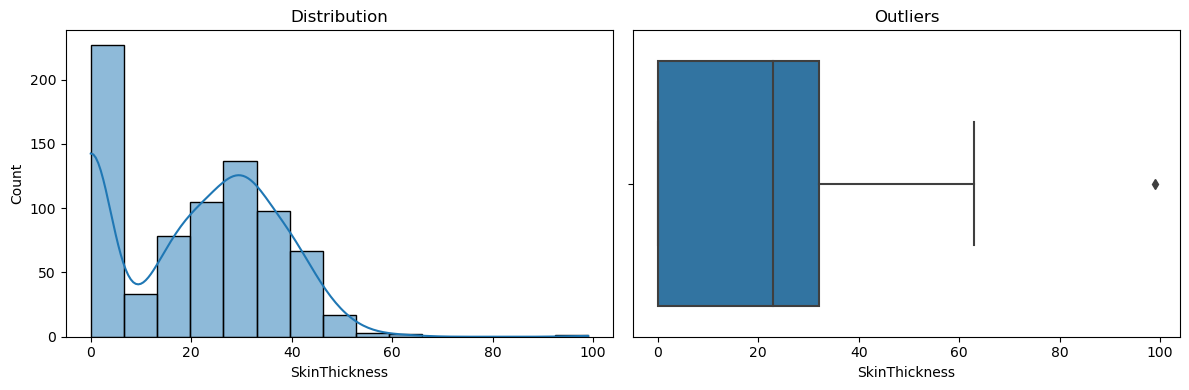

In [23]:
uniplot(df,'SkinThickness')

### Summary
		- SkinThickness has Skewness Coefficient of: 0.1 (Data is not shewd)
		- Skewness is because of Outliers (Data does not require any tranformation)
		- Most of the Population has Skin fold thickness between 20 mm - 40 mm



**(5) Insulin : 2-Hour serum insulin (mu U/ml)**

Insulin has Skewness Coefficient of: 2.272250858431574


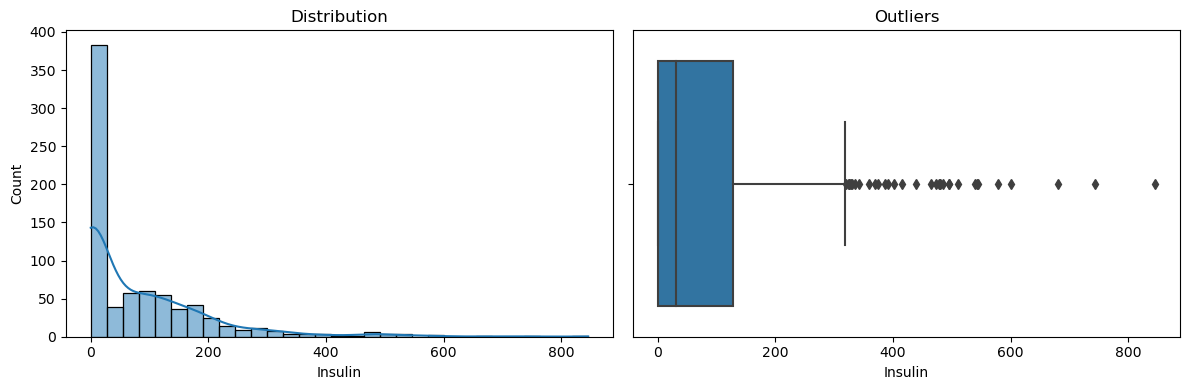

In [24]:
uniplot(df,'Insulin')

### Summary
		- Insulin has Skewness Coefficient of: 2.2 (Data is heavily skewed toward right)
		- Skewness is because of Outliers (Data does not require any tranformation)
		- Most of the Population has Insulin level between 50(mu U/ml) - 125(mu U/ml)



**(6) BMI : Body mass index (weight in kg/(height in m)^2)**

BMI has Skewness Coefficient of: -0.42898158845356543


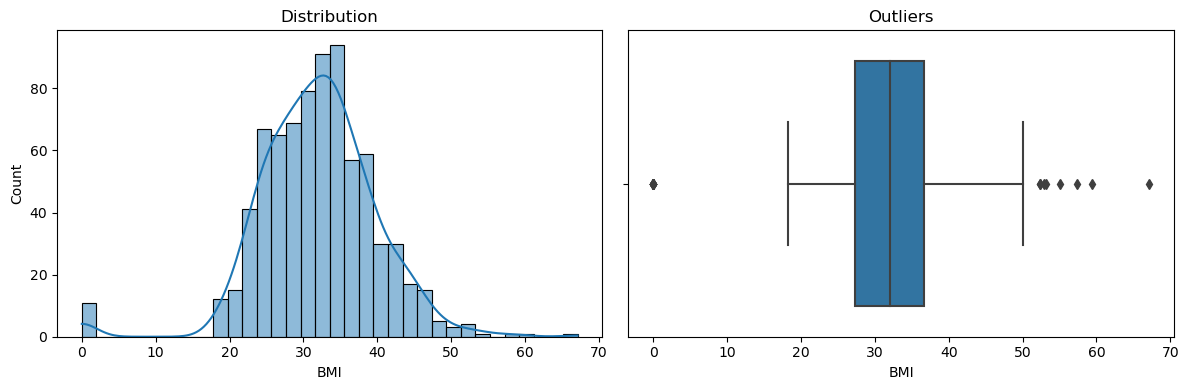

In [25]:
uniplot(df,'BMI')

### Summary
		- BMI has Skewness Coefficient of: -0.4
		- Skewness is because of Outliers (Data does not require any tranformation)
		- Most of the Population has BMI ratio between 25  - 40 (weight in kg/(height in m)^2)




**(7) DiabetesPedigreeFunction : Diabetes pedigree function**

DiabetesPedigreeFunction has Skewness Coefficient of: 1.919911066307204


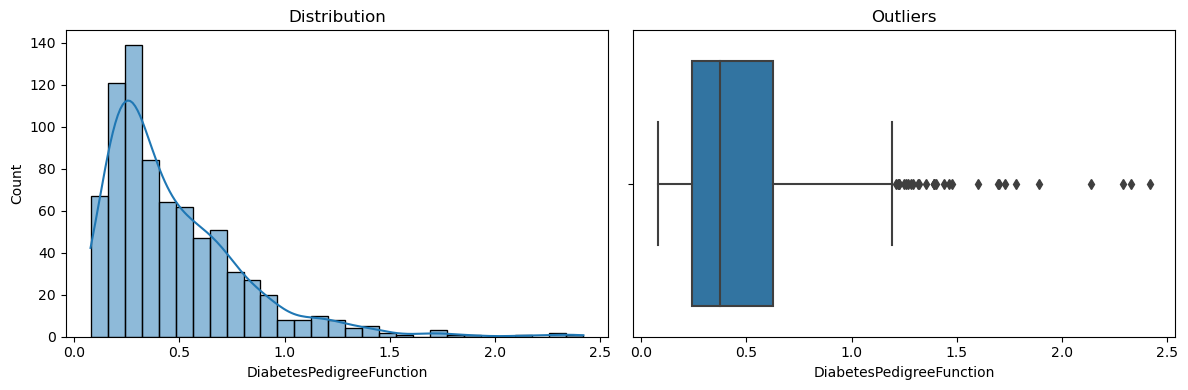

In [26]:
uniplot(df,'DiabetesPedigreeFunction')

### Summary
		- DiabetesPedigreeFunction has Skewness Coefficient of: 1.9 (Data is skewd toward right)
		- Skewness is because of Outliers (Data does not require any tranformation)
		- Most of the Population has Diabetes pedigree function between 20 - 40



**(8) Age : Age (years)**

Age has Skewness Coefficient of: 1.1295967011444805


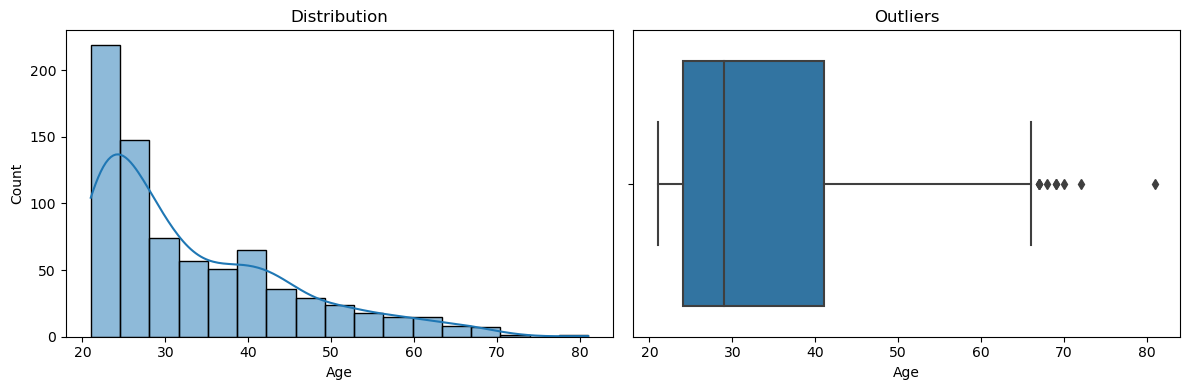

In [27]:
uniplot(df,'Age')

### Summary
		- Age has Skewness Coefficient of: 1.1(Data is skewed towards right)
		- Skewness is because of Outliers (Data does not require any tranformation)
		- Most of the Population has Age between 20  - 30 Years



**(9) Outcome : Class variable (0 or 1)  1 (diabetic),  0 (non-diabetic)**

In [28]:
df.Outcome

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [29]:
df['Outcome'].value_counts(normalize = True)*100

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

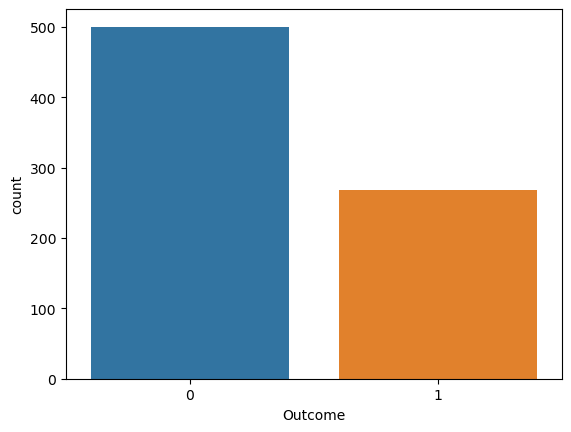

In [30]:
sns.countplot(x = 'Outcome',data = df);

### Summary
		- Outcome is the Target Variable
		- Data has imbalancy
		- 65% of Target data belongs to Class 0 (Non Diabetic)  
		- 35% of Target data belongs to Class 1 (Diabetic)
		- Data imbalacy would lead to biased learning (I am Using SMOTE technique to bring balancy in the data)

**BIVARIATE ANALYSIS**

### **Hypothesis Testing**
#### Null Hypothesis - H(0) : There is no any statistically  significant relationship among Target and Predictor variables
#### Alternate Hypothesis - H(A): There is statistically significant relationship among Target and Predictor variables

#### Here in this Project, I am taking level of Significance (alpha = 0.05). I will reject the Null hypothesis when p-value is less than alpha.


#### In BI-Variate Analysis, I will be performing **ANOVA test** and  **Point - Biserial Correlation test** for Analysing the relationship among Our Dependent and Independent Variables.

Defining Fubction to perform tests.

In [31]:
from scipy.stats import f_oneway,pointbiserialr


In [32]:
def tests(df,col,target):
  ANOVA_RES = f_oneway(df[col],df[target])
  POINT_RES = pointbiserialr(df[col],df[target])
  print(f'Anova-Test : {ANOVA_RES}')
  print(f'PointBiserial-Test : {POINT_RES}')
  sns.boxplot(x = target, y = col , data = df)
  plt.savefig(folder_path + col + '-Vs-' + target + '.png')
  plt.show()



**(1) Outcome Vs  Pregnancies**



Anova-Test : F_onewayResult(statistic=810.5150593469092, pvalue=1.7236475242343698e-143)
PointBiserial-Test : PointbiserialrResult(correlation=0.22189815303398686, pvalue=5.065127298051249e-10)


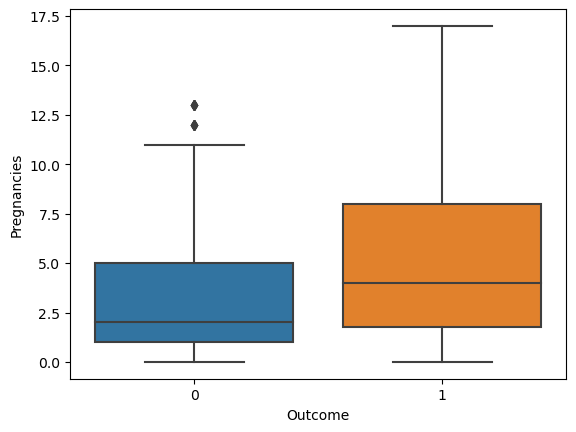

In [33]:
tests(df,'Pregnancies','Outcome')

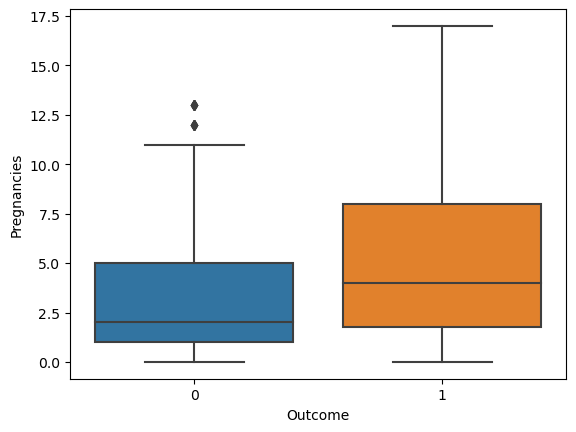

In [34]:
sns.boxplot(x = 'Outcome', y = 'Pregnancies', data = df );

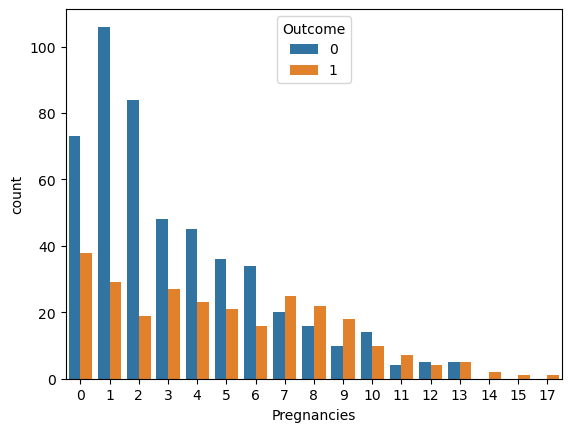

In [35]:
sns.countplot(x = 'Pregnancies', data = df, hue = 'Outcome');

In [36]:
bins = [0,3,5,8,20]
labels = ['Low','Normal','High','VeryHigh']

df['Pregnancies_bin'] = pd.cut(df['Pregnancies'],bins = bins,labels = labels)

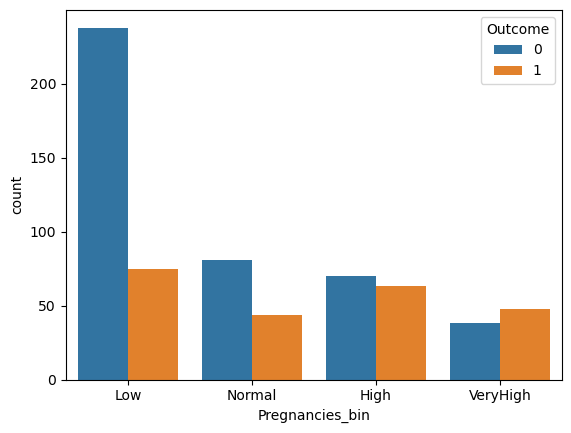

In [37]:
sns.countplot(x = 'Pregnancies_bin', data = df, hue = 'Outcome');
plt.savefig(folder_path + 'Preg_bin.png')

### Summary
- Anova-Test : F_onewayResult(statistic=810.5150593469092, pvalue=1.7236475242343698e-143)
-- High F-static Score suggests strong relation, in this case, F-static score is low
- PointBiserial-Test : SignificanceResult(statistic=0.22189815303398686, pvalue=5.065127298053635e-10)
-- Score of F-static close to zero suggest no significant relations, F-static score close to 1 or -1 suggests strong relation
- Also from the plot, it is evident that there is no significant relations between Pregnancies and Outcome

**(2) Outcome Vs  Glucose**


Anova-Test : F_onewayResult(statistic=10914.672630134193, pvalue=0.0)
PointBiserial-Test : PointbiserialrResult(correlation=0.466581398306874, pvalue=8.935431645286498e-43)


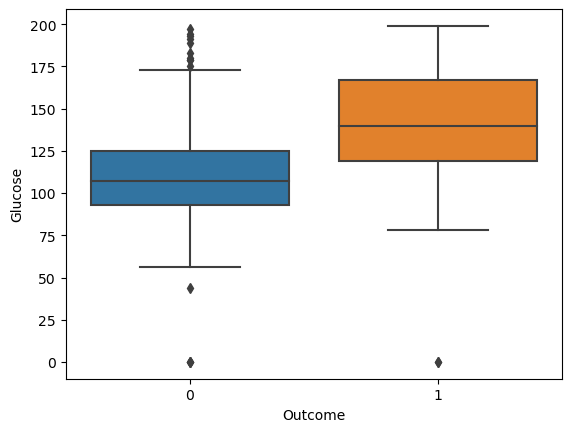

In [38]:
tests(df,'Glucose','Outcome')

### Summary
- Anova-Test : F_onewayResult(statistic=10914.672630134193, pvalue=0.0)
-- High F-static Score suggests strong relation, in this case, F-static score is High
- PointBiserial-Test : SignificanceResult(statistic=0.466581398306874, pvalue=8.935431645289576e-43)
-- Score of F-static is not close to zero suggest some significant relations
- Also from the plot, it is evident that there is significant difference among the mean of both classes, suggesting relations between Glucose and Outcome




**(3) Outcome Vs  BloodPressure**


Anova-Test : F_onewayResult(statistic=9685.068133631648, pvalue=0.0)
PointBiserial-Test : PointbiserialrResult(correlation=0.06506835955033283, pvalue=0.07151390009773193)


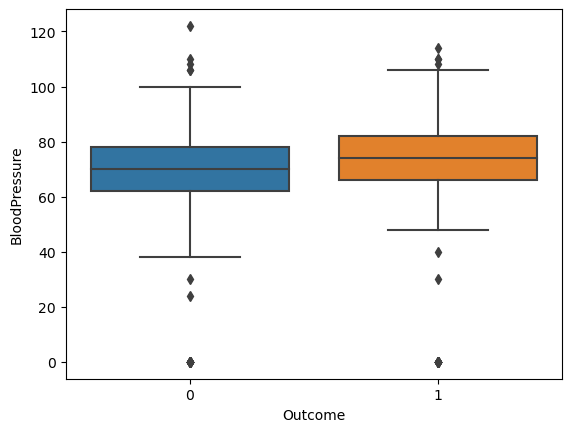

In [39]:
tests(df,'BloodPressure','Outcome')

### Summary
- Anova-Test : F_onewayResult(statistic=9685.068133631648, pvalue=0.0)
-- High F-static Score suggests strong relation, in this case, F-static score is considrably  High
- PointBiserial-Test : SignificanceResult(statistic=0.06506835955033283, pvalue=0.07151390009776264)
-- Score of F-static is so close to zero suggest no any significant relations
- Also from the plot, it is evident that there is not much  significant difference among the mean of both classes, suggesting no relation between BloodPressure and Outcome



**(4) Outcome Vs  SkinThickness**



Anova-Test : F_onewayResult(statistic=1228.8421887367274, pvalue=3.1079391612307788e-198)
PointBiserial-Test : PointbiserialrResult(correlation=0.0747522319183194, pvalue=0.03834770482047633)


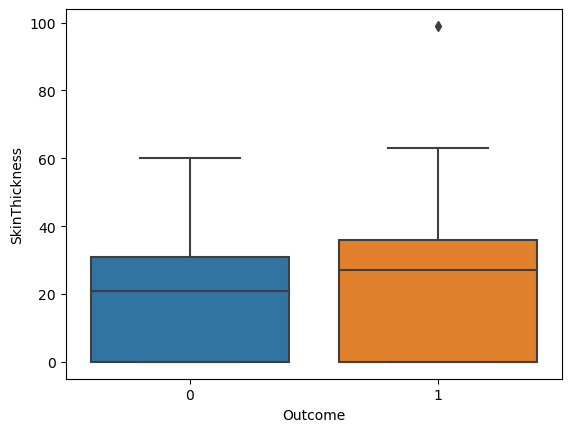

In [40]:
tests(df,'SkinThickness','Outcome')

(4) Outcome Vs  SkinThickness
		 - Anova-Test : F_onewayResult(statistic=1228.8421887367274, pvalue=3.1079391612307788e-198)
			-- High F-static Score suggests strong relation, in this case, F-static score is not  High
		- PointBiserial-Test : SignificanceResult(statistic=0.0747522319183194, pvalue=0.038347704820490915)
			-- Score of F-static is so close to zero suggest no any significant relations
		- Also from the plot, it is evident that there is not much  significant difference among the mean of both classes, suggesting no relation between SkinThickness and Outcome



**(5) Outcome Vs  Insulin**


Anova-Test : F_onewayResult(statistic=365.01491713877726, pvalue=3.6531836527047957e-73)
PointBiserial-Test : PointbiserialrResult(correlation=0.13054795488404775, pvalue=0.000286186460360213)


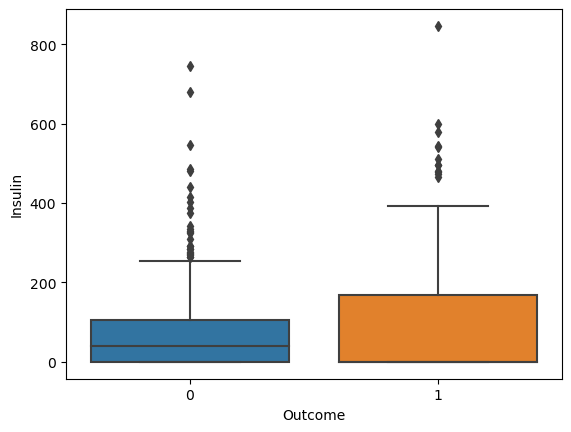

In [41]:
tests(df,'Insulin','Outcome')

(5) Outcome Vs  Insulin
		 - Anova-Test : F_onewayResult(statistic=365.01491713877726, pvalue=3.6531836527047957e-73)
			-- High F-static Score suggests strong relation, in this case, F-static score is not  High
		- PointBiserial-Test : SignificanceResult(statistic=0.13054795488404775, pvalue=0.0002861864603603164)
			-- Score of F-static is so close to zero suggest no any significant relations
		- Also from the plot, it is evident that there is not much  significant difference among the mean of both classes, suggesting no relation between Insulin and Outcome




**(6) Outcome Vs  BMI**



Anova-Test : F_onewayResult(statistic=12326.397968979043, pvalue=0.0)
PointBiserial-Test : PointbiserialrResult(correlation=0.29269466264444544, pvalue=1.2298074873111402e-16)


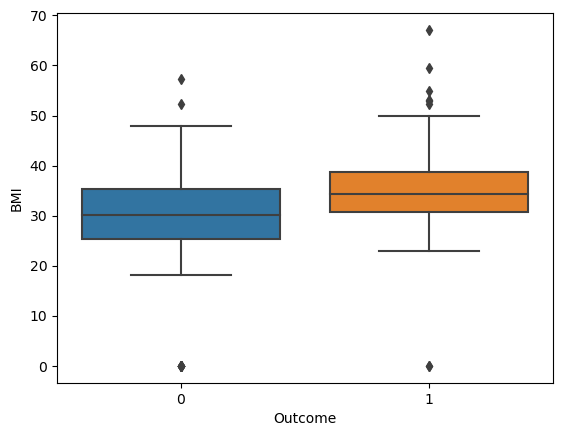

In [42]:
tests(df,'BMI','Outcome')

(6) Outcome Vs  BMI
		 - Anova-Test : F_onewayResult(statistic=12326.397968979043, pvalue=0.0)
			-- High F-static Score suggests strong relation, in this case, F-static score is   High
		- PointBiserial-Test : SignificanceResult(statistic=0.29269466264444544, pvalue=1.2298074873116917e-16)
			-- Score of F-static is not so close to zero suggest some significant relations
		- Also from the plot, it is evident that there is not much but some  significant difference among the mean of both classes, suggesting some relation between BMI and Outcome



**(7) Outcome Vs  DiabetesPedigreeFunction**



Anova-Test : F_onewayResult(statistic=34.40531346539221, pvalue=5.471443802691407e-09)
PointBiserial-Test : PointbiserialrResult(correlation=0.17384406565296007, pvalue=1.254607010148255e-06)


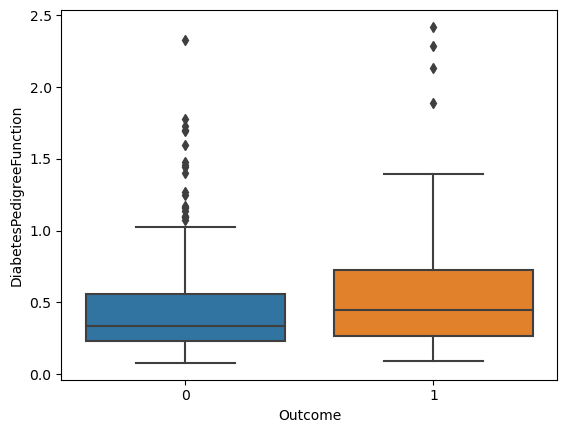

In [43]:
tests(df,'DiabetesPedigreeFunction','Outcome')

### Summary
- Anova-Test : F_onewayResult(statistic=34.40531346539221, pvalue=5.471443802691407e-09)
-- High F-static Score suggests strong relation, in this case, F-static score is  Low
- PointBiserial-Test : SignificanceResult(statistic=0.17384406565296007, pvalue=1.2546070101487771e-06)
-- Score of F-static is  close to zero suggest no significant relations
- Also from the plot, it is evident that there is not much significant difference among the mean of both classes, suggesting no relation between  DiabetesPedigreeFunction and Outcome


**(8) Outcome Vs Age**

Anova-Test : F_onewayResult(statistic=5997.832961507344, pvalue=0.0)
PointBiserial-Test : PointbiserialrResult(correlation=0.2383559830271977, pvalue=2.209975460664566e-11)


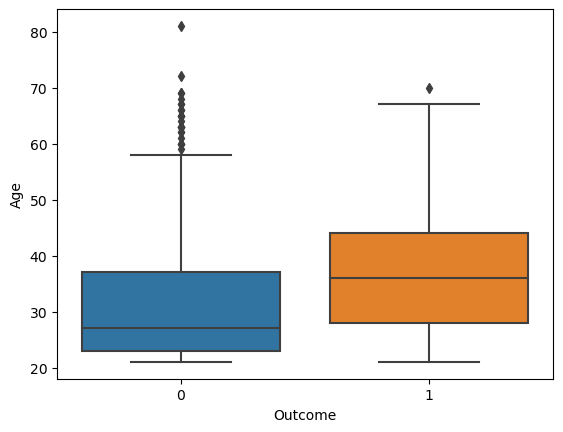

In [44]:
tests(df,'Age','Outcome')

### Summary
- Anova-Test : F_onewayResult(statistic=5997.832961507344, pvalue=0.0)
-- High F-static Score suggests strong relation, in this case, F-static score is  considerably high
- PointBiserial-Test : SignificanceResult(statistic=0.2383559830271977, pvalue=2.209975460665451e-11)
-- Score of F-static is not so  close to zero suggest some significant relations
- Also from the plot, it is evident that there is  significant difference among the mean of both classes, suggesting some relation between  Age and Outcome




**MULTI-VARIATE ANALYSIS**

(1) Plotting Pairplot: It will plot the relationship among variables

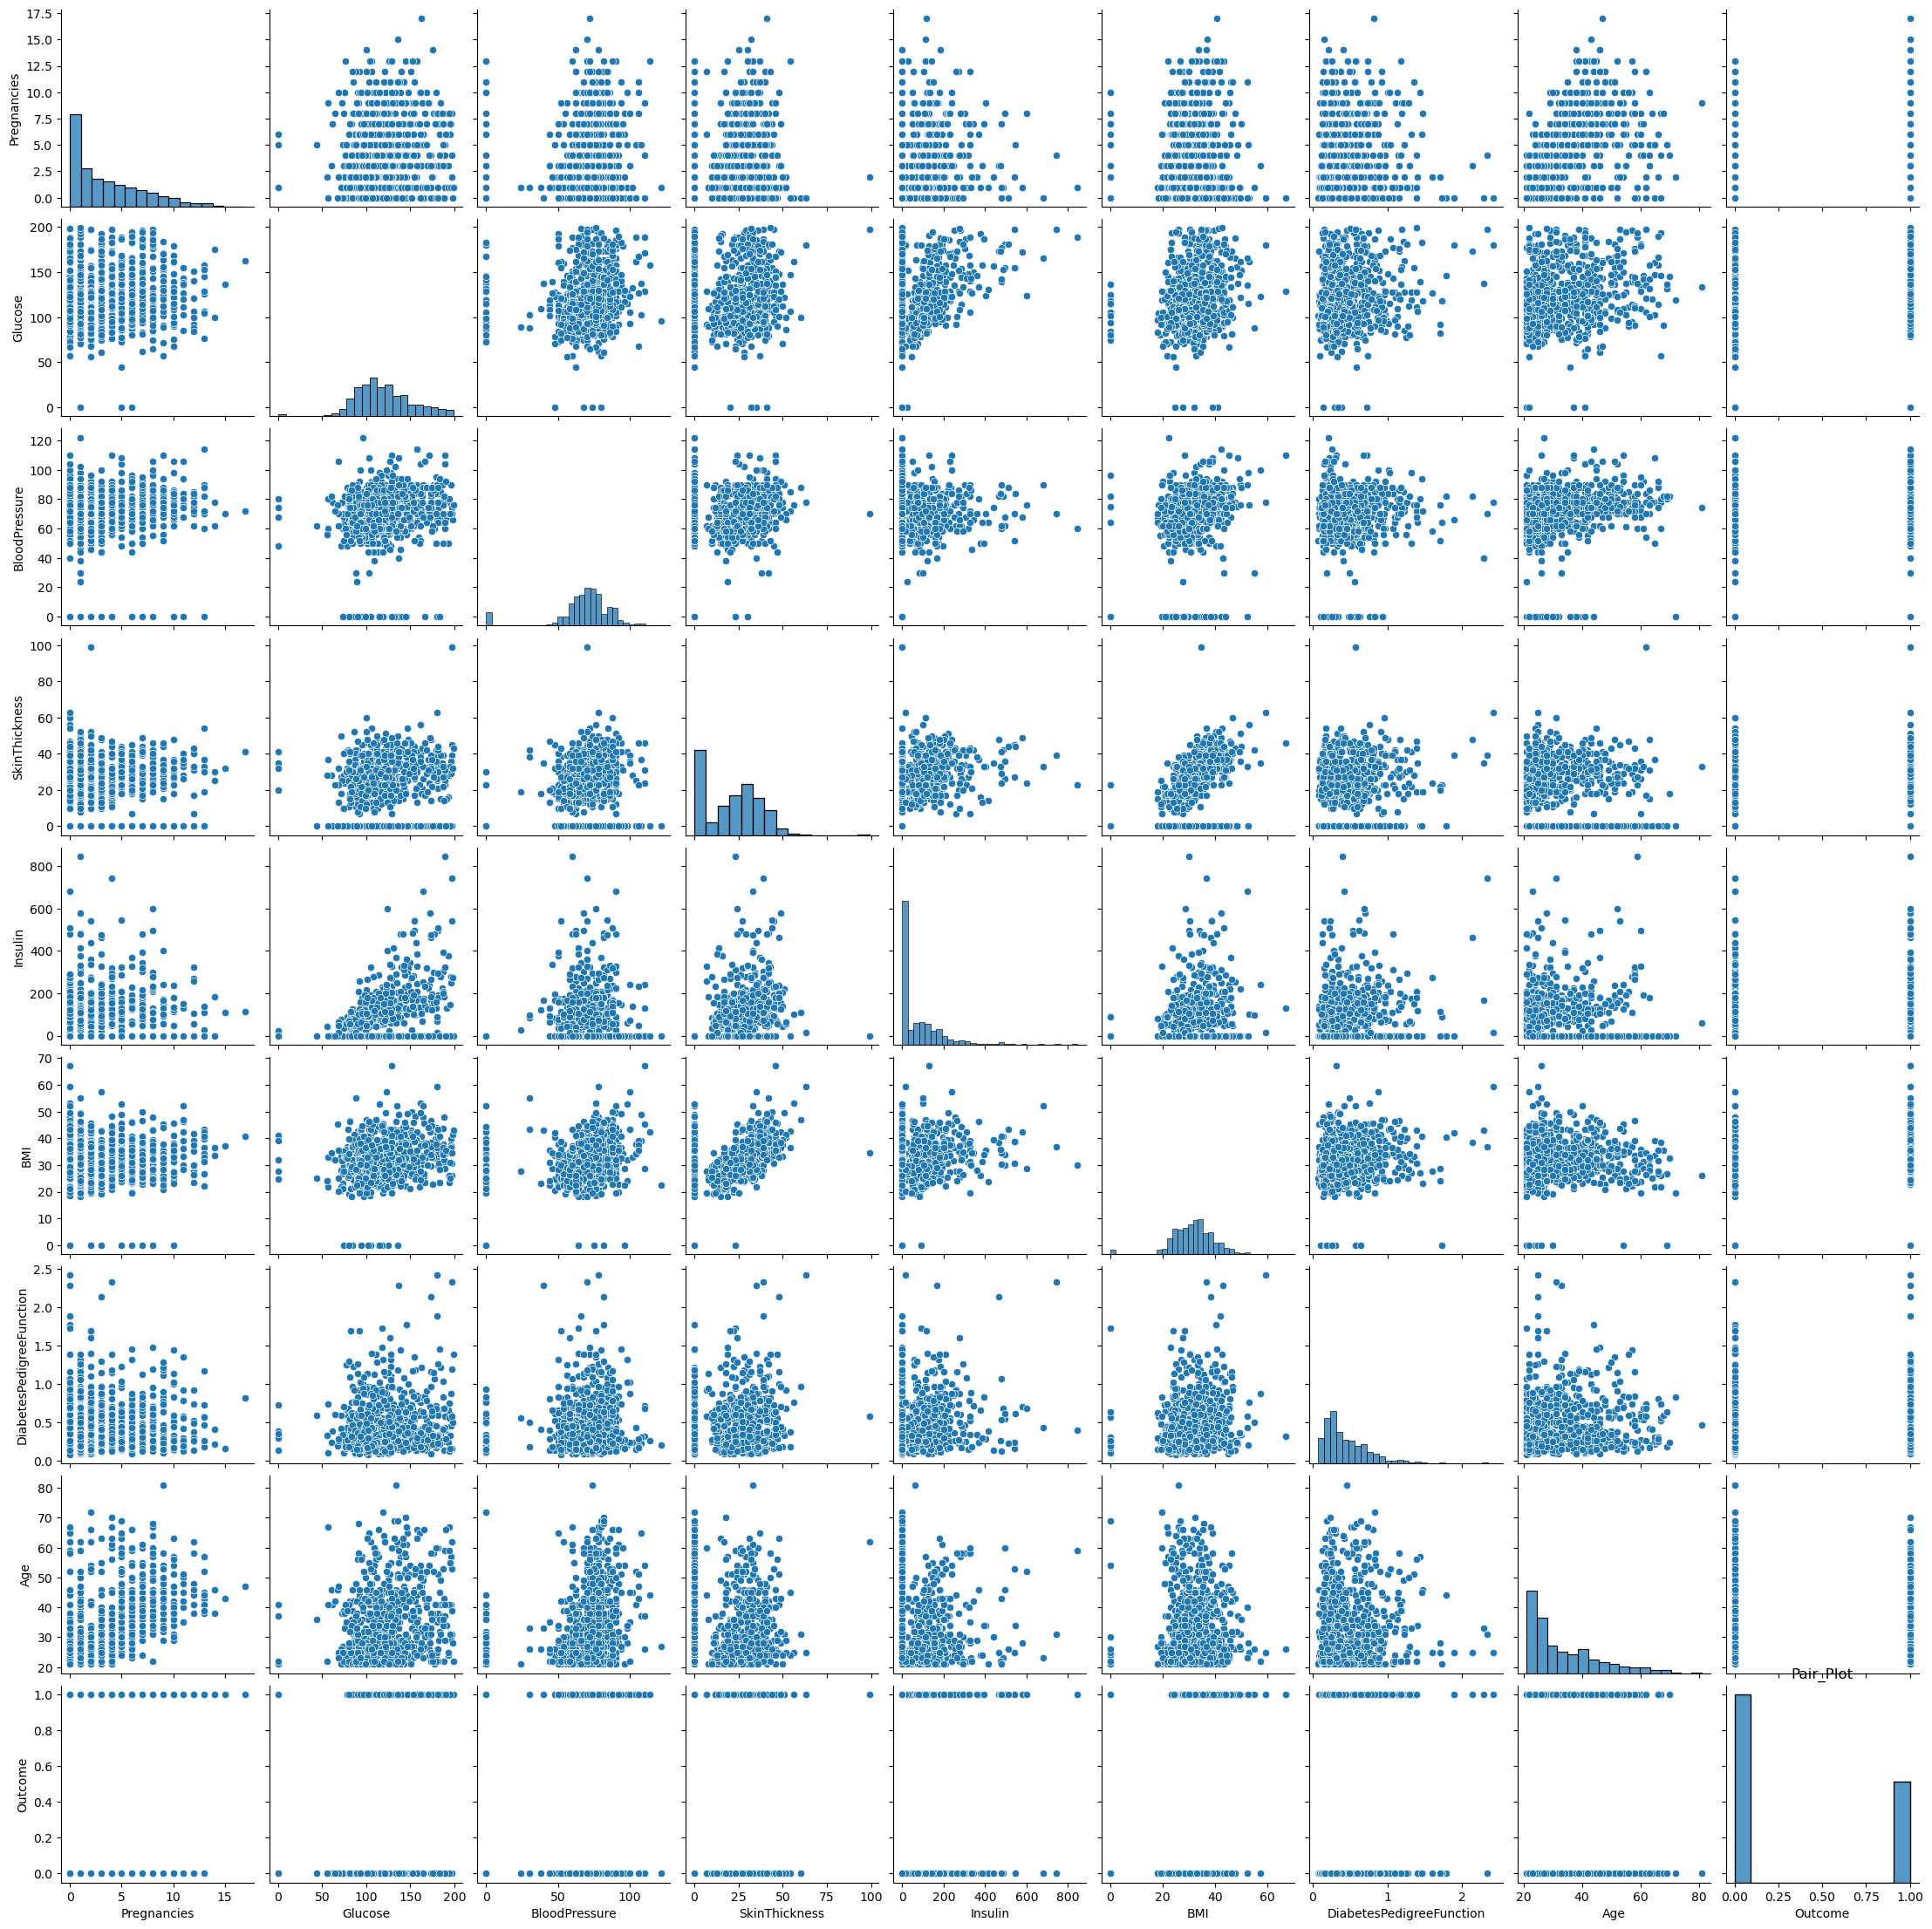

In [45]:
sns.pairplot(df);
plt.title('Pair_Plot')
plt.savefig(folder_path + 'pairplots.png')

(2) Plotting the heatmap

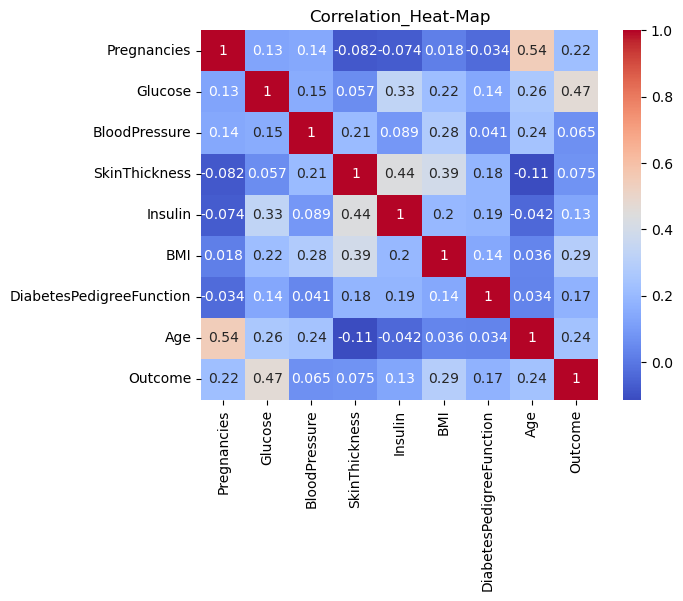

In [46]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm');
plt.title('Correlation_Heat-Map')
plt.savefig(folder_path + 'HeatMap.png')

**Data Preprocessing**

Removing Binned columns

In [47]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_bin'],
      dtype='object')

In [48]:
df = df.drop(['Pregnancies_bin'],axis = 1)
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

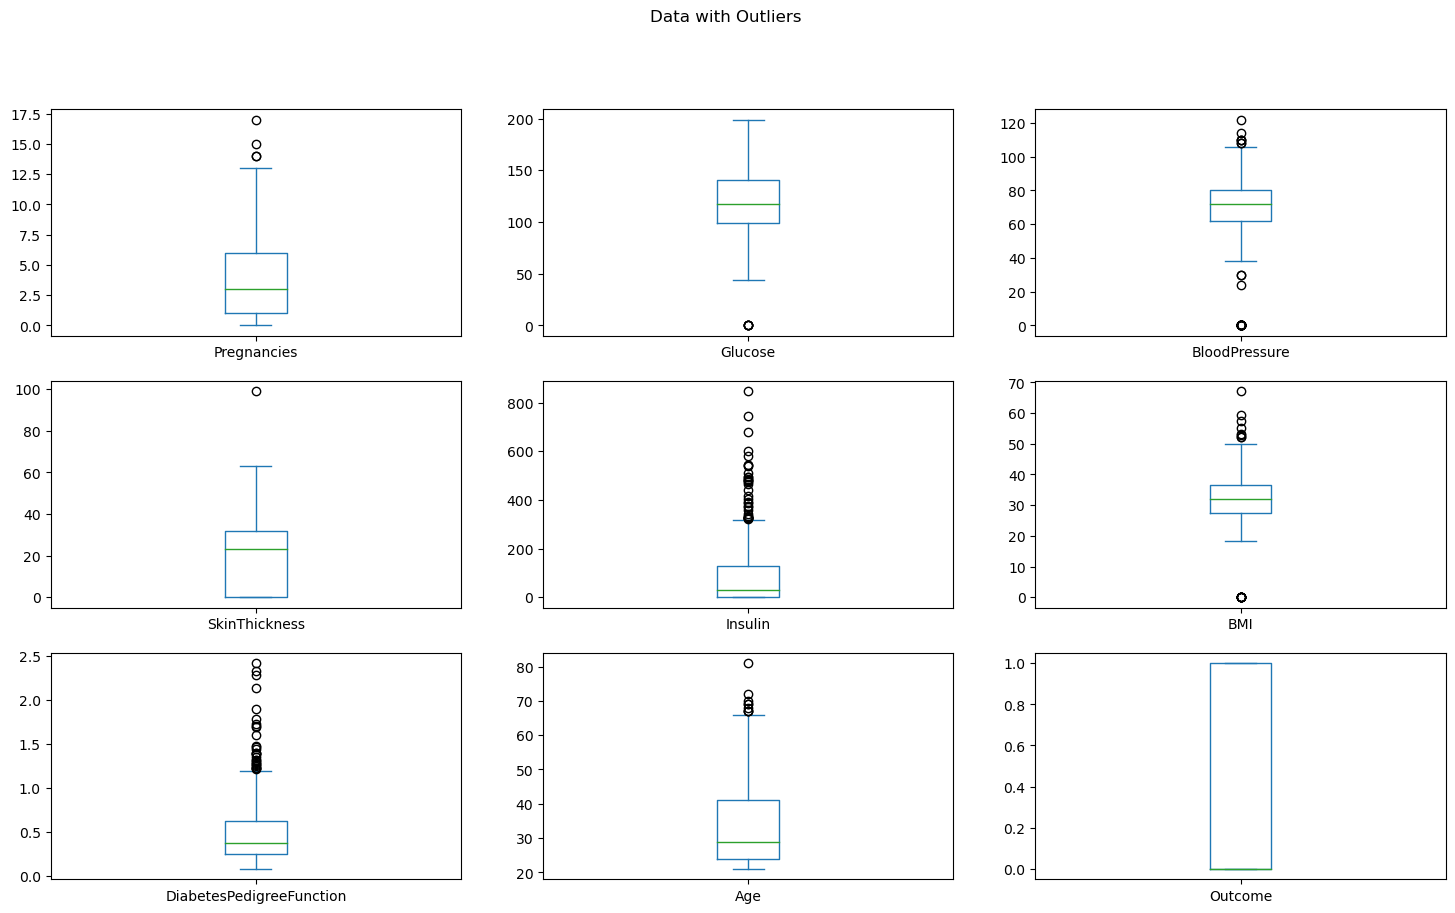

In [49]:
df.plot(kind='box',sharex= False, sharey = False, subplots = True, layout=(3,3), figsize = (18,10));
plt.suptitle('Data with Outliers');
plt.savefig(folder_path + 'Data with Outliers.png')

Removing Outliers using IQR Method

In [50]:
# Defining  a function to remove outliers using IQR

def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    # Filter rows without outliers
    df_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

    return df_no_outliers

In [51]:
# Apply the function to your DataFrame
df2 = remove_outliers(df)

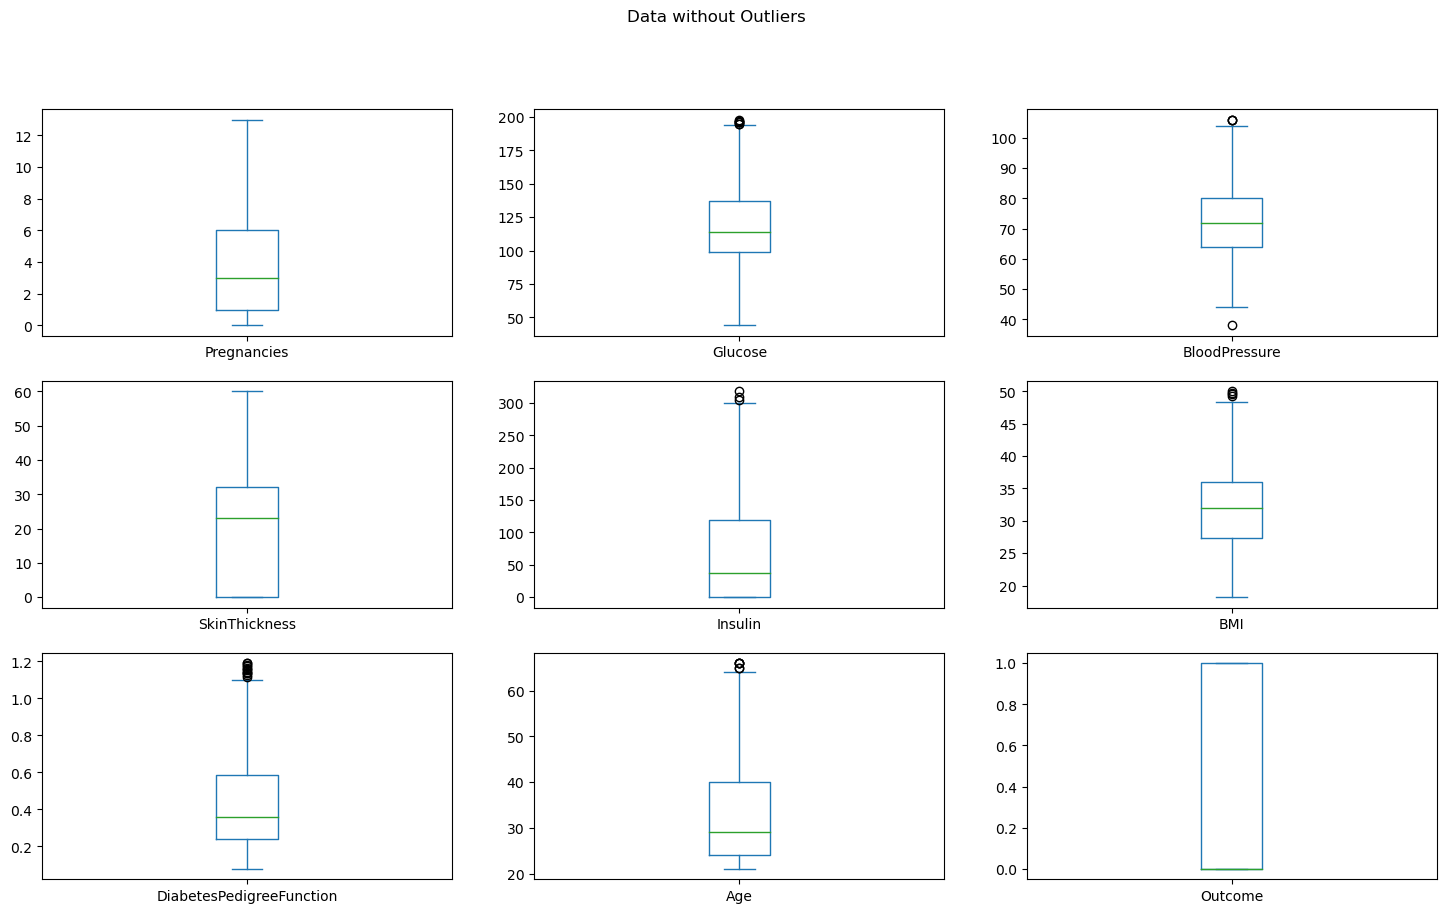

In [52]:
df2.plot(kind='box',sharex= False, sharey = False, subplots = True, layout=(3,3),figsize=(18,10));
plt.suptitle("Data without Outliers");
plt.savefig(folder_path + 'Data without Outliers.png')

In [53]:
df =  df2.copy()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


In [54]:
## Splitting Data into Train and Test set

In [55]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [56]:
X.shape,y.shape

((639, 8), (639,))

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=12)

In [58]:
y_train.value_counts()

0    345
1    166
Name: Outcome, dtype: int64

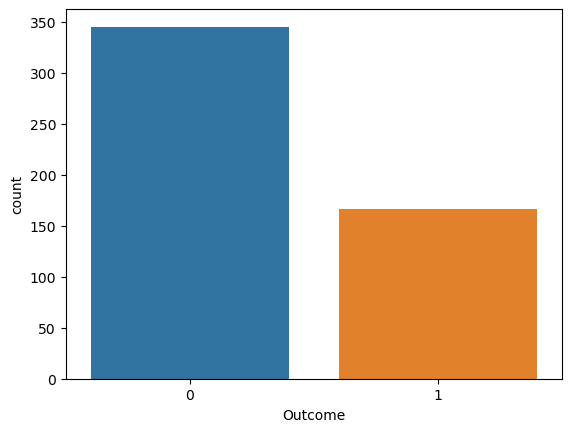

In [59]:
sns.countplot(y_train);
plt.savefig(folder_path + 'Outcome_Imbalance_Data.png')

## Treating imbalanced target variable

''' As we have already seen that our target variable is heavily imbalanced,

so we need to make it balance so that our algorith does not get biased.

I am using hybrid over sampling i.e, SMOTE and resample our training data '''

In [60]:
from imblearn.over_sampling import SMOTE

SM = SMOTE(sampling_strategy='auto',k_neighbors=1,random_state=10)

In [61]:
X_train,y_train = SM.fit_resample(X_train,y_train)

In [62]:
y_train.value_counts()

0    345
1    345
Name: Outcome, dtype: int64

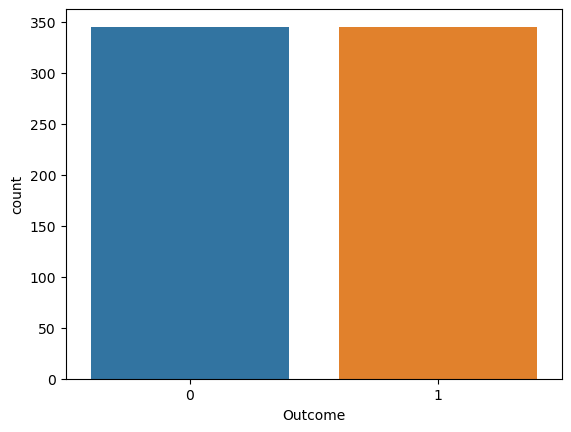

In [63]:
sns.countplot(y_train);
plt.savefig(folder_path + 'Outcome_Balanced_Data.png')

'''Initialy,when the data was imbalanced,y_train has 401 data instances belonging to class 0
and 213  data instances belonging to class 1.

Now,after treatment of imbalanced data,y_train has 401 data instances belonging to class 0 and
401 data instances belonging to class 1
'''

## Feature Scaling

In [64]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [65]:
X_train = pd.DataFrame(ss.fit_transform(X_train),columns = X_train.columns)

In [66]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.338393,-1.346868,-1.350832,0.712328,-0.585165,0.293897,-0.416206,-0.804047
1,-1.281156,-1.025509,2.523202,1.232922,0.072828,1.785202,2.457779,0.137716
2,0.604370,0.709832,0.678424,-1.304975,-0.804495,-0.492725,-1.079110,1.550360
3,-0.966902,0.581288,0.124990,0.126659,-0.061208,-1.033527,-0.751853,-1.180753
4,-1.281156,-0.061431,-0.059487,-1.304975,-0.804495,0.621657,-0.743462,1.738713


# Model Training
## 1. Logistic Regression

In [67]:
LR = LogisticRegression()

In [68]:
LR.fit(X_train,y_train)
y_pred = LR.predict(X_train)

In [69]:
accuracy_score(y_pred,y_train)

0.7608695652173914

In [70]:
print(classification_report(y_pred,y_train))

              precision    recall  f1-score   support

           0       0.78      0.75      0.77       360
           1       0.74      0.77      0.76       330

    accuracy                           0.76       690
   macro avg       0.76      0.76      0.76       690
weighted avg       0.76      0.76      0.76       690



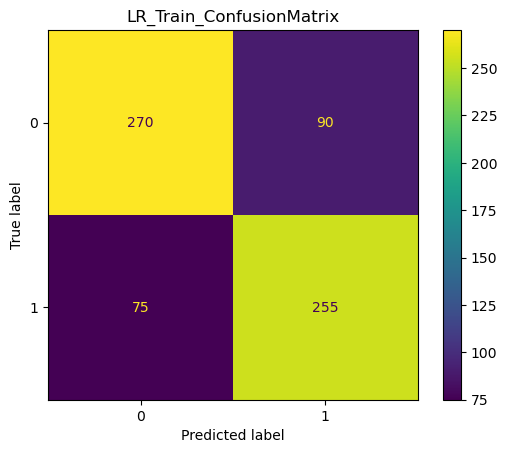

In [71]:
cm = confusion_matrix(y_pred,y_train)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title('LR_Train_ConfusionMatrix')
plt.savefig(folder_path + 'LR_Training_CM.png')

#### Model validation using Test data

In [72]:
LR.fit(X_test,y_test)
y_pred = LR.predict(X_test)

In [73]:
accuracy_score(y_pred,y_test)

0.8203125

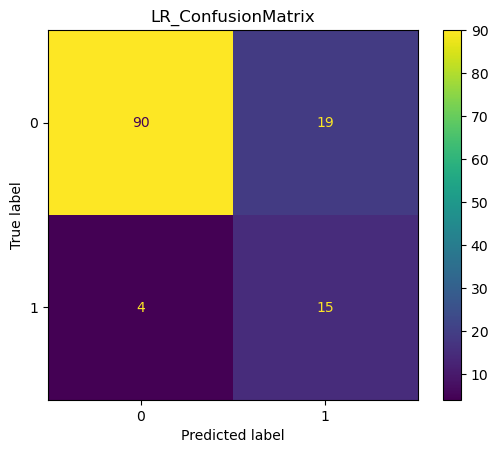

In [74]:
cm = confusion_matrix(y_pred,y_test)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();
plt.title('LR_ConfusionMatrix')
plt.savefig(folder_path + 'LR_Test_CM.png')

In [75]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89       109
           1       0.44      0.79      0.57        19

    accuracy                           0.82       128
   macro avg       0.70      0.81      0.73       128
weighted avg       0.88      0.82      0.84       128



# Model Training
## 2. SupportVectorClassifier(SVC)

In [76]:
svc = SVC()

In [77]:
svc.fit(X_train,y_train)
y_pred = svc.predict(X_train)

In [78]:
accuracy_score(y_train,y_pred)

0.8492753623188406

In [79]:
print(classification_report(y_pred,y_train))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       335
           1       0.86      0.84      0.85       355

    accuracy                           0.85       690
   macro avg       0.85      0.85      0.85       690
weighted avg       0.85      0.85      0.85       690



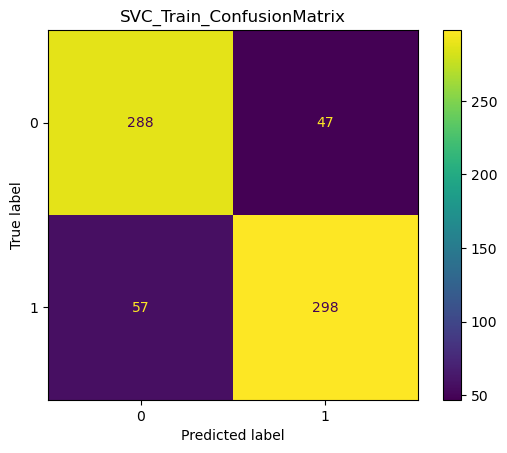

In [80]:
cm = confusion_matrix(y_pred,y_train)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title('SVC_Train_ConfusionMatrix')
plt.savefig(folder_path + 'SVC_TR_CM.png')

### Model Validation

In [81]:
svc.fit(X_test,y_test)
y_pred = svc.predict(X_test)

In [82]:
accuracy_score(y_test,y_pred)

0.78125

In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        94
           1       1.00      0.18      0.30        34

    accuracy                           0.78       128
   macro avg       0.89      0.59      0.59       128
weighted avg       0.83      0.78      0.72       128



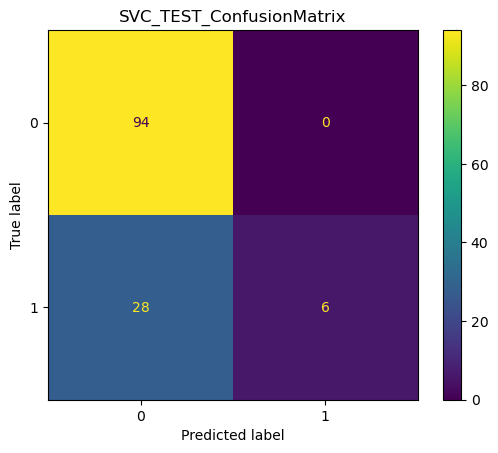

In [84]:
cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title('SVC_TEST_ConfusionMatrix')
plt.savefig(folder_path + 'SVC_TEST_CM.png')

# Model Training
## 3. DecisionTree

In [85]:
DT = DecisionTreeClassifier()

In [86]:
DT.fit(X_train,y_train)
y_pred = DT.predict(X_train)

In [87]:
accuracy_score(y_train,y_pred)

1.0

In [88]:
print(classification_report(y_pred,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       345
           1       1.00      1.00      1.00       345

    accuracy                           1.00       690
   macro avg       1.00      1.00      1.00       690
weighted avg       1.00      1.00      1.00       690



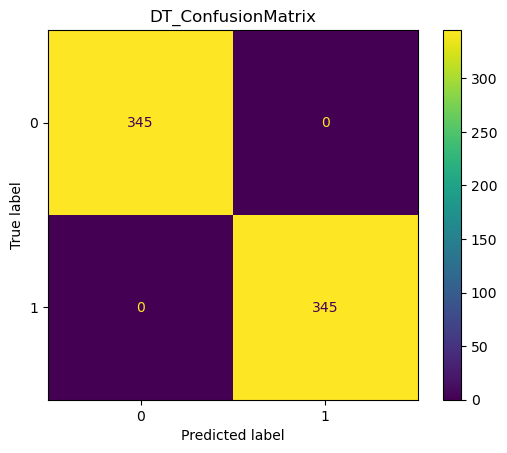

In [89]:
cm = confusion_matrix(y_train,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title('DT_ConfusionMatrix')
plt.savefig(folder_path + 'DT_Train_CM.png')

### Model Validation

In [90]:
DT.fit(X_test,y_test)
y_pred = DT.predict(X_test)
accuracy_score(y_pred,y_test)

1.0

In [91]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00        34

    accuracy                           1.00       128
   macro avg       1.00      1.00      1.00       128
weighted avg       1.00      1.00      1.00       128



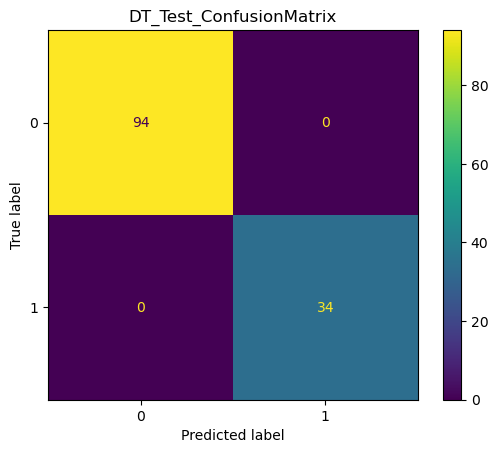

In [92]:
cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title('DT_Test_ConfusionMatrix')
plt.savefig(folder_path + 'DT_Test_CM.png')

# Model Training
## 4. Bagging

#### Here, i am using default base estimator (DecisionTreeCLassifier) and kept number of estimators = 10

### Model Training with base_estimator - DecisionTree

In [93]:
bag = BaggingClassifier()
bag.fit(X_train,y_train)

BaggingClassifier()

In [94]:
y_pred = bag.predict(X_train)

In [95]:
accuracy_score(y_train,y_pred)

0.991304347826087

In [96]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       345
           1       0.99      0.99      0.99       345

    accuracy                           0.99       690
   macro avg       0.99      0.99      0.99       690
weighted avg       0.99      0.99      0.99       690



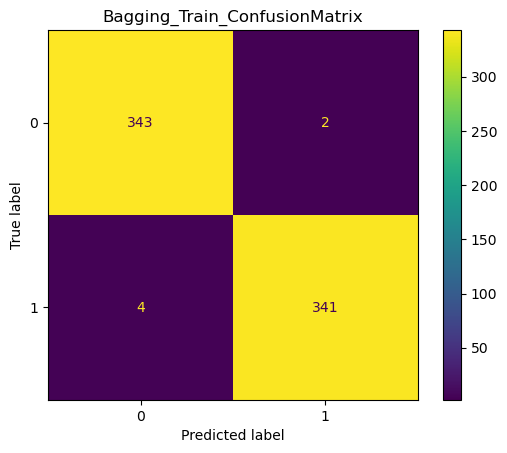

In [97]:
cm = confusion_matrix(y_train,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title('Bagging_Train_ConfusionMatrix')
plt.savefig(folder_path + 'Bagging_Train_CM.png')

### Model Validation

In [98]:
bag.fit(X_test,y_test)

BaggingClassifier()

In [99]:
y_pred = bag.predict(X_test)
accuracy_score(y_test,y_pred)

0.9765625

In [100]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        94
           1       1.00      0.91      0.95        34

    accuracy                           0.98       128
   macro avg       0.98      0.96      0.97       128
weighted avg       0.98      0.98      0.98       128



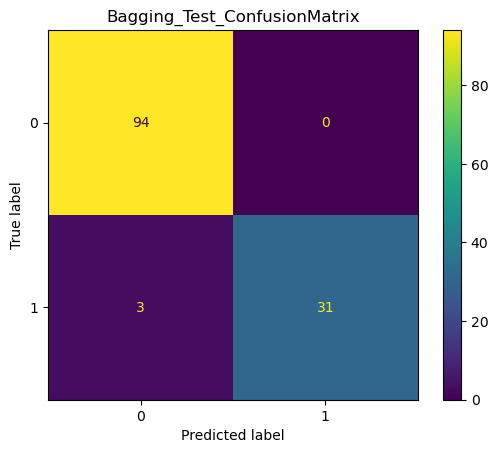

In [101]:
cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title('Bagging_Test_ConfusionMatrix')
plt.savefig(folder_path + 'Bagging_Test_CM.png')

#### Here, i am using  base estimator (SVC) and kept number of estimators = 10

### Model Training with base_estimator - SVC

In [102]:
bg = BaggingClassifier(base_estimator=SVC(),n_estimators=10,random_state=0)

In [103]:
bg.fit(X_train,y_train)

BaggingClassifier(base_estimator=SVC(), random_state=0)

In [104]:
y_pred = bg.predict(X_train)
accuracy_score(y_train,y_pred)

0.8492753623188406

In [105]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       345
           1       0.85      0.85      0.85       345

    accuracy                           0.85       690
   macro avg       0.85      0.85      0.85       690
weighted avg       0.85      0.85      0.85       690



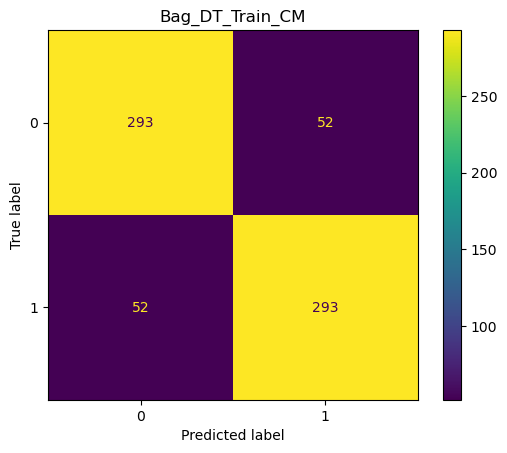

In [106]:
cm = confusion_matrix(y_train,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title('Bag_DT_Train_CM')
plt.savefig(folder_path + 'Bag_DT_Train_CM.png')

#### Model Validation

In [107]:
bg.fit(X_test,y_test)

BaggingClassifier(base_estimator=SVC(), random_state=0)

In [108]:
y_pred = bg.predict(X_test)
accuracy_score(y_test,y_pred)

0.7734375

In [109]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87        94
           1       1.00      0.15      0.26        34

    accuracy                           0.77       128
   macro avg       0.88      0.57      0.56       128
weighted avg       0.83      0.77      0.70       128



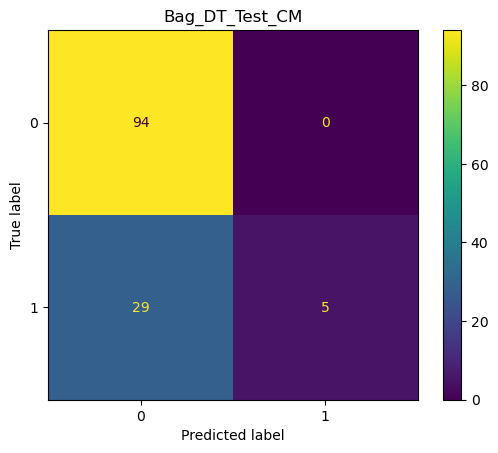

In [110]:
cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title('Bag_DT_Test_CM')
plt.savefig(folder_path + 'Bag_DT_Test_CM.png')

# Model Training
## 5. RandomForest

In [111]:
RF = RandomForestClassifier(max_depth=2,random_state=0)

In [112]:
RF.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [113]:
y_pred = RF.predict(X_train)
accuracy_score(y_train,y_pred)

0.8072463768115942

In [114]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       345
           1       0.78      0.86      0.82       345

    accuracy                           0.81       690
   macro avg       0.81      0.81      0.81       690
weighted avg       0.81      0.81      0.81       690



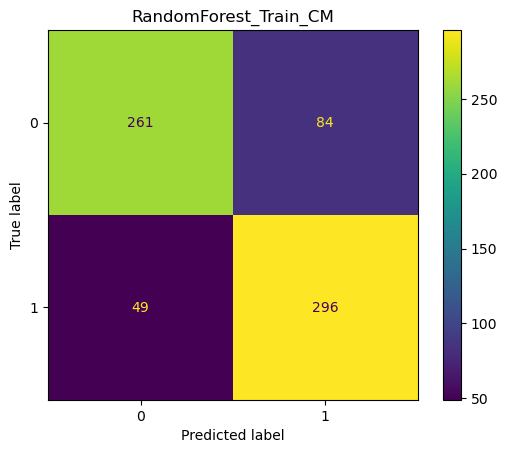

In [115]:
cm = confusion_matrix(y_train,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title('RandomForest_Train_CM')
plt.savefig(folder_path + 'RandomForest_Train_CM.png')

### Model Validation

In [116]:
RF.fit(X_test,y_test)

RandomForestClassifier(max_depth=2, random_state=0)

In [117]:
y_pred = RF.predict(X_test)
accuracy_score(y_test,y_pred)

0.828125

In [118]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90        94
           1       1.00      0.35      0.52        34

    accuracy                           0.83       128
   macro avg       0.91      0.68      0.71       128
weighted avg       0.86      0.83      0.80       128



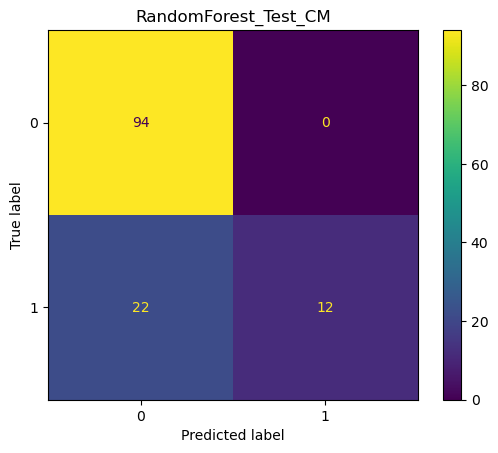

In [119]:
cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title('RandomForest_Test_CM')
plt.savefig(folder_path + 'RandomForest_Test_CM.png')

# Model Training
## 6. Boosting

'''
Here i am training the model with default hyper-parametrs values:
learning_rate=0.1, 
n_estimators=100, 
max_depth = 3
'''


In [120]:
GBC = GradientBoostingClassifier()

In [121]:
GBC.fit(X_train,y_train)

GradientBoostingClassifier()

In [122]:
y_pred = GBC.predict(X_train)
accuracy_score(y_train,y_pred)

0.9405797101449276

In [123]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       345
           1       0.92      0.96      0.94       345

    accuracy                           0.94       690
   macro avg       0.94      0.94      0.94       690
weighted avg       0.94      0.94      0.94       690



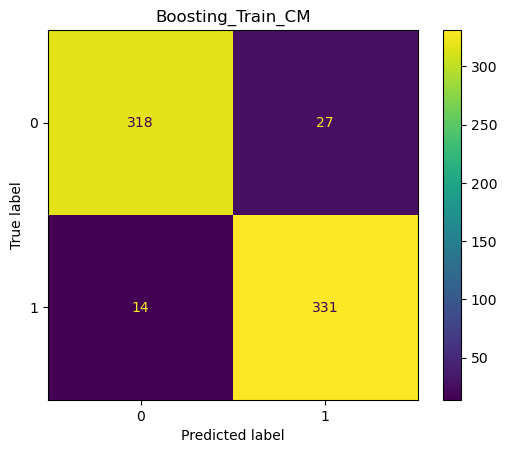

In [124]:
cm = confusion_matrix(y_train,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title('Boosting_Train_CM')
plt.savefig(folder_path + 'Boosting_Train_CM.png')

### Model Validation

In [125]:
GBC.fit(X_test,y_test)

GradientBoostingClassifier()

In [126]:
y_pred = GBC.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

In [127]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00        34

    accuracy                           1.00       128
   macro avg       1.00      1.00      1.00       128
weighted avg       1.00      1.00      1.00       128



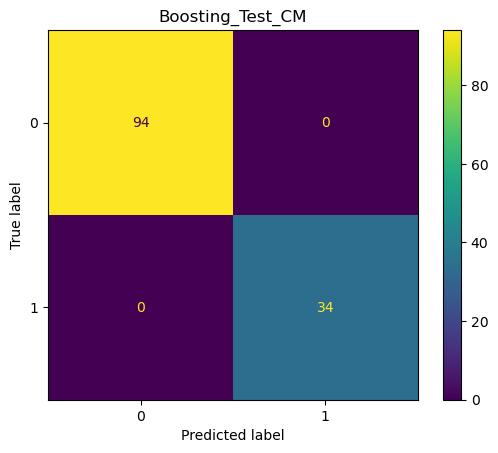

In [128]:
cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title('Boosting_Test_CM')
plt.savefig(folder_path + 'Boosting_Test_CM.png')

## CONCLUSION:

'''
After an in-depth analysis of various machine learning models, including Logistic Regression,
Support Vector Classifier (SVC), Decision Tree, BaggingClassifier, RandomForest, and GradientBoosting, 
I have identified two standout performers for our task.

1. Decision Tree Model:
    - Training Accuracy: 100%
    - Validation Accuracy: 100%

2. Boosting ML Model:
    - Training Accuracy: 98%
    - Validation Accuracy: 100%
    
Observations:

The Decision Tree model demonstrates exceptional accuracy on both the training and validation datasets, 
achieving a perfect score of 100%.
The Boosting ML Model also exhibits outstanding performance, with a training accuracy of 98% and 
maintaining a flawless 100% validation accuracy.

Key Considerations:

The Decision Tree model excels in simplicity and interpretability, providing a robust solution 
with no signs of overfitting.
Boosting, with its ensemble approach, showcases impressive generalization capabilities, making 
it a reliable choice for accurate predictions.

Final Decision:

Based on the comprehensive evaluation of accuracy metrics and model behavior, 
both the Decision Tree and Boosting ML Models have proven to be highly effective.
The choice between them may depend on specific project requirements, interpretability, 
and the desired balance between simplicity and predictive power.
'''